In [1]:
### Import dynamic simulations 
from PathLoader import PathLoader
from DataLink import DataLink 
path_loader = PathLoader('data_config.env', 'current_user.env')
TheLink = DataLink(path_loader, 'data_codes.csv')

### Plot a specific specie in a specifc cell line

In [2]:
dynamic_feature = TheLink.get_data_from_code('dynamic_simulation_data_all', verbose=True)

# function to select cellline from dynamic data 

cellline = 'ACH-001113'

specie = 'INSR'


selected_data = dynamic_feature[dynamic_feature['Cellline'] == cellline]

selected_data.head()

Data code dynamic_simulation_data_all loaded at data/results/matlab/dynamic_simulation_data_all.csv with index position 0. Enforced raw loading: True


,Cellline,Time,INSR,INSRpY,IRS,IRSi,S6KpT389,PI3K,INSRccIRSccPI3K,PDK1,...,RBp,RBpp,E2FccRB,E2FccRBp,E2FccRBpp,CDK46ccCYCDccP21,CDK46ccCYCDccP27,CDK2ccCYCEccP21,CDK2ccCYCEccP27,CDK2ccCYCEccP27p
0,ACH-001113,1,520.582691,1.025712,14.895045,841.234700,66.310241,452.624757,0.011378,275.679449,...,11.078342,177.432464,1.957924,418.582619,0.004415,281.288640,234.960774,104.382196,2.946210,0.002417
1,ACH-001113,2,520.259338,0.177857,128.244349,726.714189,6.685797,452.619149,0.016986,275.678875,...,2.994683,226.256336,266.893789,113.568781,0.022160,0.002902,506.589547,112.445563,2.126252,0.001744
2,ACH-001113,3,520.268326,0.201012,112.800134,742.190546,7.737442,452.619249,0.016885,275.678885,...,2.621340,268.446041,238.947906,99.821154,0.020620,0.002835,507.099092,117.306612,2.260340,0.001854
3,ACH-001113,4,520.272259,0.210970,107.370995,747.633577,8.180216,452.619266,0.016869,275.678887,...,2.335707,301.003963,217.334658,89.228087,0.019278,0.002778,507.410442,120.914807,2.370465,0.001945
4,ACH-001113,5,520.274104,0.215485,105.232364,749.778568,8.367511,452.619248,0.016887,275.678885,...,2.117821,325.870565,200.851910,81.101948,0.018171,0.002727,507.648593,123.586819,2.462432,0.002020


In [3]:
specie_data = selected_data[specie]
print(specie_data.shape, type(specie_data))
specie_data.head()

(3000,) <class 'pandas.core.series.Series'>


0    520.582691
1    520.259338
2    520.268326
3    520.272259
4    520.274104
Name: INSR, dtype: float64

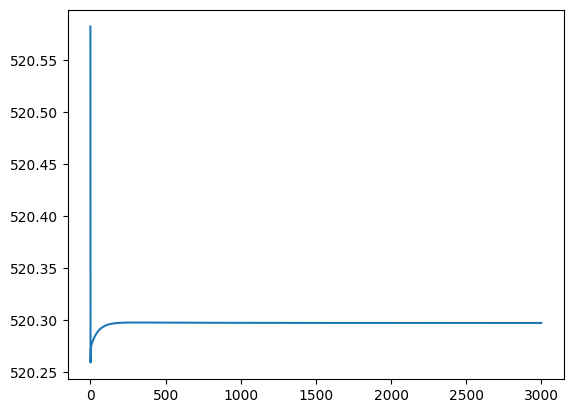

In [4]:
# plot the data

import matplotlib.pyplot as plt

plt.plot(specie_data)
plt.show()

### Plot all cell lines for one specie

In [5]:
# selecting dynamic simulations for one protein specie across all cell lines

specie = 'IRS'

selected_data = dynamic_feature[['Cellline', 'Time', specie]]

In [6]:
selected_data.shape

(4218000, 3)

In [7]:
selected_data.head()

,Cellline,Time,IRS
0,ACH-001113,1,14.895045
1,ACH-001113,2,128.244349
2,ACH-001113,3,112.800134
3,ACH-001113,4,107.370995
4,ACH-001113,5,105.232364


In [8]:
# transform the data to have time as columns and cell lines as rows

pivoted_data = selected_data.pivot(index='Cellline', columns='Time', values=specie)

In [9]:
pivoted_data.head(10)

Time,1,2,3,4,5,6,7,8,9,10,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
Cellline,,,,,,,,,,,,,,,,,,,,,
ACH-000001,13.119350,144.398993,127.105641,120.309482,117.346139,115.931001,115.169407,114.690743,114.337761,114.043029,...,104.082744,104.082746,104.082747,104.082748,104.082750,104.082751,104.082752,104.082754,104.082755,104.082756
ACH-000002,7.530726,82.116394,72.810533,68.063107,65.436273,63.893025,62.932753,62.296009,61.842795,61.495802,...,53.934836,53.934836,53.934836,53.934836,53.934836,53.934836,53.934836,53.934836,53.934836,53.934836
ACH-000003,6.832813,81.667457,71.959624,67.743606,65.694957,64.590462,63.918047,63.450262,63.083239,62.768847,...,53.970073,53.970074,53.970074,53.970075,53.970075,53.970076,53.970076,53.970077,53.970077,53.970077
ACH-000004,2.299558,61.171586,53.112353,48.839687,46.369376,44.857491,43.888429,43.238833,42.782052,42.443837,...,36.383919,36.383920,36.383921,36.383922,36.383923,36.383924,36.383925,36.383926,36.383927,36.383928
ACH-000005,2.387915,66.748384,57.769015,53.149517,50.547140,48.989792,48.008920,47.358206,46.901294,46.560333,...,39.934167,39.934169,39.934170,39.934172,39.934173,39.934175,39.934176,39.934178,39.934179,39.934181
ACH-000006,4.296393,55.186947,51.289947,49.848761,49.193554,48.806982,48.517938,48.268492,48.038708,47.821503,...,41.115154,41.115154,41.115154,41.115154,41.115154,41.115154,41.115154,41.115154,41.115154,41.115154
ACH-000007,23.535030,152.780290,134.883120,127.087129,123.384171,121.513981,120.504045,119.908037,119.514617,119.222182,...,110.943901,110.943902,110.943902,110.943903,110.943903,110.943904,110.943905,110.943905,110.943906,110.943906
ACH-000008,25.077797,357.748378,309.436515,288.132570,277.840560,272.599857,269.810960,268.246942,267.304883,266.682334,...,253.070473,253.070476,253.070478,253.070481,253.070484,253.070487,253.070490,253.070493,253.070496,253.070498
ACH-000009,6.101105,68.917971,61.816441,58.983477,57.687695,56.995187,56.550647,56.212983,55.925101,55.663580,...,47.937835,47.937835,47.937836,47.937836,47.937837,47.937837,47.937838,47.937838,47.937838,47.937839


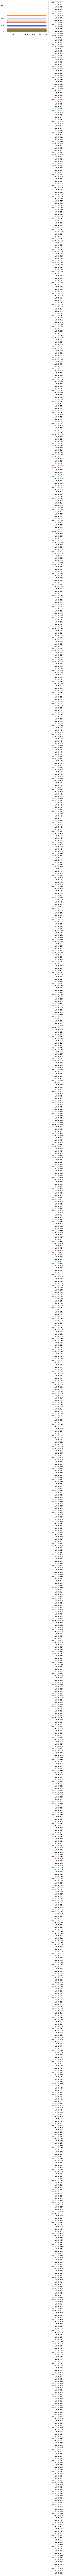

In [10]:
import matplotlib.pyplot as plt

# plot every cell line
for cellline in pivoted_data.index:
    plt.plot(pivoted_data.loc[cellline])
    # label the plot
    
plt.legend(pivoted_data.index, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Select all species for one cell line

In [ ]:
cellline = 'ACH-001113'
selected_data = dynamic_feature[dynamic_feature['Cellline'] == cellline]

In [ ]:
import matplotlib.pyplot as plt

for specie in selected_data.columns[2:]:
    plt.plot(selected_data['Time'], selected_data[specie])
    
# plt.legend(selected_data.columns[2:], bbox_to_anchor=(1.05, 1), loc='upper left')

# show within y range of 0 to x, a visually useful range
plt.ylim(0,500)
plt.show()

### Calculating Dynamic Simulations

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

## calculating AUC for a specific specie and cell line

specie = 'IRS'
cellline = 'ACH-001113'

selected_data = dynamic_feature[dynamic_feature['Cellline'] == cellline]
specie_data = selected_data[specie]

# plot the data

plt.plot(specie_data)
plt.show()

# calculate AUC

auc = np.trapz(specie_data, dx=1)

print('AUC:',auc)

# obtain the max value of the specie

max_value = specie_data.max()

print('Max:',max_value)

# obtain the time at which the max value occurs

max_time = specie_data.idxmax()

print('Max time:',max_time)

# obtain the min value of the specie

min_value = specie_data.min()

print('Min:',min_value)

# obtain the time at which the min value occurs

min_time = specie_data.idxmin()

print('Min time:',min_time)

# mean value of the specie

mean_value = specie_data.mean()

print('Mean:',mean_value)

# median value of the specie

median_value = specie_data.median()

print('Median:',median_value)


# total fold change (TFC) from 0 to end 

start = specie_data.iloc[0]
end = specie_data.iloc[-1]

# print('Start:',start)
# print('End:',end)

tfc = (end - start) / start

print('Total Fold Change:',tfc)

# time to stable value (TSV), a time point t where the value of the specie no longer changes more than 0.01 for all t' > t

tsv = specie_data.shape[0]
change_abs_tolerance = 0.01
difference = specie_data.diff()

while tsv > 0:
    if abs(difference.iloc[tsv-1]) < change_abs_tolerance:
        tsv = tsv - 1
    else:
        break

print('Time to stable value:',tsv)


In [ ]:
# normalise all time based values and AUC to the maximum simulation time

max_sim_time = specie_data.shape[0]

n_auc = auc / max_sim_time
n_max_time = max_time / max_sim_time
n_min_time = min_time / max_sim_time
n_tsv = tsv / max_sim_time

print('Normalised AUC:',n_auc)
print('Normalised max time:',n_max_time)
print('Normalised min time:',n_min_time)
print('Normalised TSV:',n_tsv)


In [ ]:
### iterate through all cell lines and species and calculate all dynamic simulation features, return a dataframe

import numpy as np
import pandas as pd

# function to calculate dynamic simulation features for a specie and cell line

def calculate_dynamic_simulation_features(specie, cellline, dynamic_data, normalise_time_based_values=True):
    selected_data = dynamic_data[dynamic_data['Cellline'] == cellline]
    specie_data = selected_data[specie]
    # reset index to start from 0
    specie_data = specie_data.reset_index(drop=True)
    
    # calculate AUC
    auc = np.trapz(specie_data, dx=1)
    
    # obtain the max value of the specie
    max_value = specie_data.max()
    
    # obtain the time at which the max value occurs
    max_time = specie_data.idxmax()
    
    # obtain the min value of the specie
    min_value = specie_data.min()
    
    # obtain the time at which the min value occurs
    min_time = specie_data.idxmin()
    
    # mean value of the specie
    mean_value = specie_data.mean()
    
    # median value of the specie
    median_value = specie_data.median()
    
    # total fold change (TFC) from 0 to end 
    start = specie_data.iloc[0]
    end = specie_data.iloc[-1]
    tfc = (end - start) / start
    
    # time to stable value (TSV), a time point t where the value of the specie no longer changes more than 0.01 for all t' > t
    tsv = specie_data.shape[0]
    change_abs_tolerance = 0.01
    difference = specie_data.diff()
    while tsv > 0:
        if abs(difference.iloc[tsv-1]) < change_abs_tolerance:
            tsv = tsv - 1
        else:
            break
    
    # normalise all time based values and AUC to the maximum simulation time
    max_sim_time = specie_data.shape[0]
    n_auc = auc / max_sim_time
    n_max_time = max_time / max_sim_time
    n_min_time = min_time / max_sim_time
    n_tsv = tsv / max_sim_time
    
    if normalise_time_based_values:
        return [n_auc, max_value, n_max_time, min_value, n_min_time, mean_value, median_value, tfc, n_tsv]
    
    return [auc, max_value, max_time, min_value, min_time, mean_value, median_value, tfc, tsv]

all_species = dynamic_feature.columns[2:]
all_celllines = dynamic_feature['Cellline'].unique()

new_dataset = []

for c in all_celllines:
    cellline_dynamic_features = []
    for s in all_species:
        cellline_dynamic_features.extend(calculate_dynamic_simulation_features(s, c, dynamic_feature))
    new_dataset.append(cellline_dynamic_features)
    

dynamic_feature_label = ['auc', 'max', 'max_time', 'min', 'min_time', 'mean', 'median', 'tfc', 'tsv']    
new_df = pd.DataFrame(new_dataset, columns=[s + '_' + dynamic_feature for s in all_species for dynamic_feature in dynamic_feature_label], index=all_celllines)
new_df.head()


## Visualisation of processed dynamic features vs. original features 

In [ ]:
dynamic_feature = TheLink.get_data_from_code('dynamic_features')
ccle_data = TheLink.get_data_from_code('ccle')

### Automatic Plot Generation 

In [ ]:
import matplotlib.pyplot as plt
import os 

match_rules_file = TheLink.get_data_from_code('integrate_ccle_anthony')
match_rules_files_dropna = match_rules_file.dropna(subset=['CCLE reference'])

dynamic_feature_label = ['auc', 'max', 'max_time', 'min', 'min_time', 'mean', 'median', 'tfc', 'tsv']    

folder_name = 'dynamic_features_ccle_plots'

if not os.path.exists(f'{path_loader.get_data_path()}data/results/{folder_name}'):
    os.makedirs(f'{path_loader.get_data_path()}data/results/{folder_name}')

file_save_path = f'{path_loader.get_data_path()}data/results/{folder_name}/'

species_ccle_matches = {}
for i in range(len(match_rules_files_dropna)):
    row = match_rules_files_dropna.iloc[i]  
    specie_name = row['Protein Name']
    ccle_matches = row['CCLE reference']
    ccle_matches = ccle_matches.split(';')
    species_ccle_matches[specie_name] = ccle_matches
    

for s in species_ccle_matches:
    dynamic_specie = s 
    gene_list = species_ccle_matches[s]
    dynamic_features = dynamic_feature[[dynamic_specie + '_' + dynamic_feature for dynamic_feature in dynamic_feature_label]]

    # plot all dynamic features against gene expression as a multi-panel plot

    fig, axes = plt.subplots(3, 3, figsize=(15, 15))

    for i, dynamic_feature in enumerate(dynamic_feature_label):
        ax = axes.flatten()[i]
        for gene in gene_list:
            gene_expression = ccle_data[gene]
            ax.scatter(gene_expression, dynamic_features[dynamic_specie + '_' + dynamic_feature], alpha=0.5, s=10)
        ax.legend(gene_list, loc='upper left')
        # change the x and y axis labels size
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.set_xlabel('Gene expression', fontsize=15)
        ax.set_ylabel(dynamic_feature, fontsize=15)

    plt.suptitle(
        f'{dynamic_specie} dynamic features vs gene expression of {gene_list}', fontsize=20)
    plt.tight_layout()
    plt.savefig(f'{file_save_path}{dynamic_specie}_dynamic_features_vs_gene_expression.png')    
    # do not show the plot
    plt.close()



### Visualising One Specie vs two genes

In [ ]:
dynamic_specie = 'CDK46'
ccle_gene = 'CDK6'
ccle_gene_2 = 'CDK4'

In [ ]:
gene_expression = ccle_data[ccle_gene]
gene_expression_2 = ccle_data[ccle_gene_2]
dynamic_feature_label = ['auc', 'max', 'max_time', 'min', 'min_time', 'mean', 'median', 'tfc', 'tsv']    

# extract dynamic features for a specie
dynamic_features = dynamic_feature[[dynamic_specie + '_' + dynamic_feature for dynamic_feature in dynamic_feature_label]]


In [ ]:
dynamic_features.head()

In [ ]:
# plot all dynamic features against gene expression as a multi-panel plot

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15,15))

for i, dynamic_feature in enumerate(dynamic_feature_label):
    ax = axes.flatten()[i]
    ax.scatter(gene_expression, dynamic_features[dynamic_specie + '_' + dynamic_feature], alpha=0.5, s=10)
    ax.scatter(gene_expression_2, dynamic_features[dynamic_specie + '_' + dynamic_feature], alpha=0.5, s=10)
    ax.legend([ccle_gene, ccle_gene_2], loc='upper left')
    # change the x and y axis labels size
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Gene expression', fontsize=15)
    ax.set_ylabel(dynamic_feature, fontsize=15)

plt.suptitle(f'{dynamic_specie} dynamic features vs gene expression of {ccle_gene} and {ccle_gene_2}', fontsize=20)
plt.tight_layout()
plt.show()

    


### Visualising One Specie

In [ ]:
dynamic_specie = 'CDK46'
ccle_gene = 'CDK6'

In [ ]:
gene_expression = ccle_data[ccle_gene]
gene_expression_2 = ccle_data[ccle_gene_2]
dynamic_feature_label = ['auc', 'max', 'max_time', 'min', 'min_time', 'mean', 'median', 'tfc', 'tsv']    

# extract dynamic features for a specie
dynamic_features = dynamic_feature[[dynamic_specie + '_' + dynamic_feature for dynamic_feature in dynamic_feature_label]]


In [ ]:
dynamic_features.head()

In [ ]:
# plot all dynamic features against gene expression as a multi-panel plot

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15,15))

for i, dynamic_feature in enumerate(dynamic_feature_label):
    ax = axes.flatten()[i]
    ax.scatter(gene_expression, dynamic_features[dynamic_specie + '_' + dynamic_feature], alpha=0.5, s=10)
    ax.legend([ccle_gene, ccle_gene_2], loc='upper left')
    # change the x and y axis labels size
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Gene expression', fontsize=15)
    ax.set_ylabel(dynamic_feature, fontsize=15)

plt.suptitle(f'{dynamic_specie} dynamic features vs gene expression of {ccle_gene}', fontsize=20)
plt.tight_layout()
plt.show()

    


### Loading Dynamic Features and Labels

In [2]:
feature_data, label_data = TheLink.get_data_using_code('anthony-ode-gdsc-2-Palbociclib-LN_IC50-default')

## Variance and similarity of dynamic features

against original features from ccle expression

### Random

In [ ]:
ccle_sample_info = TheLink.get_data_from_code('ccle_sample_info')
dynamic_feature = TheLink.get_data_from_code('dynamic_features')
ccle_data = TheLink.get_data_from_code('ccle')

In [ ]:
depmap_to_sanger = ccle_sample_info[['DepMap_ID', 'Sanger_Model_ID']]
depmap_to_sanger = depmap_to_sanger.dropna(subset=['Sanger_Model_ID'])
    


In [ ]:
# join dynamic features and depmap_to_sanger

dynamic_features = dynamic_feature.join(depmap_to_sanger.set_index('DepMap_ID'), on='Unnamed: 0')
dynamic_features.head()

In [ ]:
dynamic_features.drop(columns=['Unnamed: 0'], inplace=True)
dynamic_features.head()

In [ ]:
dynamic_features.set_index('Sanger_Model_ID', inplace=True)

In [ ]:
dynamic_features.head()

In [ ]:
gdsc = TheLink.get_data_from_code('gdsc2')

In [ ]:
from DataFunctions import create_joint_dataset_from_proteome_gdsc, create_feature_and_label

joint_dataset = create_joint_dataset_from_proteome_gdsc('Palbociclib', dynamic_features, gdsc)
feature_data, label_data = create_feature_and_label(joint_dataset)

In [ ]:
feature_data.head()

In [ ]:
label_data.head()

In [ ]:
feature_data.shape

#### Follow-up of Wk48 2023 Research Update

Comparing normalised combined ccle expression to novel dynamic features

In [2]:
import os

import numpy as np
import pandas as pd

PARAM_FOLDER_NAME = 'create-initial-conditions'
PARAM_COMBINATION_METHOD = 'average'
SILENT = False

from PathLoader import PathLoader
from DataLink import DataLink 
path_loader = PathLoader('data_config.env', 'current_user.env')
TheLink = DataLink(path_loader, 'data_codes.csv')
TheLink.load_data_code('ccle')
ccle_df = TheLink.data_code_database['ccle']

### Bring in model default initial conditions from sbml file
import roadrunner
rr = roadrunner.RoadRunner("data\export_ECC_Base.xml")
species = rr.model.getFloatingSpeciesIds()
for idx, specie in enumerate(species):
    if not SILENT: print(f'{idx} {specie} init {rr.model[f"init({specie})"]} curr {rr.model[specie]}')

### Bring in spreadsheet for matching rules between CCLE and model species

match_rules_file = TheLink.get_data_from_code('integrate_ccle_anthony')
match_rules_files_dropna = match_rules_file.dropna(subset=['CCLE reference'])

species_ccle_matches = {}
for i in range(len(match_rules_files_dropna)):
    row = match_rules_files_dropna.iloc[i]  
    specie_name = row['Protein Name']
    ccle_matches = row['CCLE reference']
    ccle_matches = ccle_matches.split(';')
    if not SILENT: print(f'{specie_name}: {ccle_matches}')
    species_ccle_matches[specie_name] = ccle_matches

### Bring in the initial conditions for the species from best parameter sets for consistency

best_paramsets = TheLink.get_data_from_code('best_paramsets_anthony')
params_row = best_paramsets.iloc[0]

species_value_dict = {}
for col in params_row.index:
    if col in species:
        model_specie_value = params_row[col]
        # print(f'species {col} set to {params_row[col]}')
        species_value_dict[col] = model_specie_value
        
    ### Begin to create the initial conditions for the species 
    
dataset = []
combination_method = PARAM_COMBINATION_METHOD
normalised_ratio_dataset = []
    
for specie_name, specie_value in species_value_dict.items():
    if specie_name in species_ccle_matches:
        matches = species_ccle_matches[specie_name]
        if len(matches) > 1: 
            if not SILENT: print(f'COMBINATION {specie_name} {specie_value} {species_ccle_matches[specie_name]}')
            # combination normalisation method 
            # two options:
            #   1. average combination 
            #   2. weighted by sample size combination
            if combination_method == 'average': 
                N = len(matches)
                all_columns = []
                # debug operations 
                medians = []
                sample_row_vals = []
                sample_ccle_vals = []
                for match in matches: 
                    gene_column = ccle_df[match]
                    gene_column_no_zero = gene_column[gene_column != 0]
                    m = gene_column_no_zero.median()
                    s = specie_value
                    normalised_column = gene_column / m
                    all_columns.append(normalised_column)
                    # following are debug operations
                    medians.append(m)
                    sample_row_vals.append(normalised_column[0])
                    sample_ccle_vals.append(gene_column[0])
                    
                all_columns = pd.concat(all_columns, axis=1)
                # sum row wise and divide by N, multiply by specie value
                normalised_columns = all_columns.sum(axis=1) / N
                sum_row_columns = normalised_columns * s
                
                # verify logic 
                # get the first value of each column in all_columns

                print('medians', medians)
                print('ccle vals', sample_ccle_vals)
                print('transformed vals', sample_row_vals)
                print('final ratio',all_columns.sum(axis=1)[0] / N)
                print('multiply by initial cond', sum_row_columns[0], sum_row_columns.shape)
                
                # final append
                sum_row_columns = list(sum_row_columns)
                dataset.append(sum_row_columns) 
                
                # normalised ratio dataset
                normalised_columns = list(normalised_columns)
                normalised_ratio_dataset.append(normalised_columns)
                
            elif combination_method == 'weighted': 
                # TODO: once this is done, this script is largely complete
                all_columns = []
                length_vector = []
                for match in matches:
                    gene_column = ccle_df[match]
                    gene_column_no_zero = gene_column[gene_column != 0]
                    length = len(gene_column_no_zero)
                    length_vector.append(length)
                    m = gene_column_no_zero.median()
                    s = specie_value
                    normalised_column = gene_column / m
                    all_columns.append(normalised_column)
                
                all_columns = pd.concat(all_columns, axis=1)
                length_vector = np.array(length_vector)
                length_vector = length_vector / length_vector.sum()
                
                # multiply by length vector
                transformed_columns = all_columns * length_vector
                # sum row wise and multiply by specie value
                sum_row_columns = transformed_columns.sum(axis=1) * s
                
                # verify logic
                # print('length vector', length_vector)
                # print('all columns', list(all_columns.iloc[0]))
                # print('transformed vals', list(transformed_columns.iloc[0]))
                # print('final ratio', transformed_columns.sum(axis=1)[0])
                # print('sum row columns', sum_row_columns[0], sum_row_columns.shape)
                
                
                # final append
                sum_row_columns = list(sum_row_columns)
                dataset.append(sum_row_columns)
                
                # normalised ratio dataset
                transformed_columns = list(transformed_columns)
                normalised_ratio_dataset.append(transformed_columns)
                
        elif len(matches) == 1:
            # direct normalisation method 
            if not SILENT: print(f'DIRECT {specie_name} {specie_value} {species_ccle_matches[specie_name]}')
            gene_column = ccle_df[species_ccle_matches[specie_name][0]]
            gene_column_no_zero = gene_column[gene_column != 0]
            m = gene_column_no_zero.median()
            s = specie_value
            species_column = gene_column / m * s 
            species_column = list(species_column)
            if not SILENT:
                print(species_column[0])
            dataset.append(species_column) 
            normalised_ratio_dataset.append(list(gene_column / m))
            
        else: 
            # throw error
            raise ValueError(f'No matches for {specie_name}')
    else: 
        # replace with default value 
        if not SILENT:
            print(f'REPLACE {specie_name} {specie_value}')
        
        specie_value_column = [specie_value] * ccle_df.shape[0]
        dataset.append(specie_value_column)
        normalised_ratio_dataset.append(specie_value_column)

new_df = pd.DataFrame(normalised_ratio_dataset).transpose()
new_df.columns = species
new_df.index = ccle_df['CELLLINE']

0 INSR init 500.0 curr 500.0
1 INSRpY init 500.0 curr 500.0
2 IRS init 500.0 curr 500.0
3 IRSi init 500.0 curr 500.0
4 S6KpT389 init 500.0 curr 500.0
5 PI3K init 500.0 curr 500.0
6 INSRccIRSccPI3K init 500.0 curr 500.0
7 PDK1 init 500.0 curr 500.0
8 PDK1b init 500.0 curr 500.0
9 MTORC2 init 500.0 curr 500.0
10 MTORC2b init 500.0 curr 500.0
11 AKT init 500.0 curr 500.0
12 AKTpT308 init 500.0 curr 500.0
13 AKTpS473 init 500.0 curr 500.0
14 AKTpp init 500.0 curr 500.0
15 MTORC1 init 500.0 curr 500.0
16 MTORC1a init 500.0 curr 500.0
17 ERKpp init 500.0 curr 500.0
18 CDK46ccCYCD init 500.0 curr 500.0
19 MTORC1i init 500.0 curr 500.0
20 S6K init 500.0 curr 500.0
21 GSK3B init 500.0 curr 500.0
22 GSK3Bi init 500.0 curr 500.0
23 SOS init 500.0 curr 500.0
24 INSRccIRSccSOS init 500.0 curr 500.0
25 SOSi init 500.0 curr 500.0
26 RAF init 500.0 curr 500.0
27 RAFa init 500.0 curr 500.0
28 RAFi init 500.0 curr 500.0
29 ERK init 500.0 curr 500.0
30 MYC init 500.0 curr 500.0
31 E2F init 500.0 curr 500

In [3]:
new_df.head()

,INSR,INSRpY,IRS,IRSi,S6KpT389,PI3K,INSRccIRSccPI3K,PDK1,PDK1b,MTORC2,...,RBp,RBpp,E2FccRB,E2FccRBp,E2FccRBpp,CDK46ccCYCDccP21,CDK46ccCYCDccP27,CDK2ccCYCEccP21,CDK2ccCYCEccP27,CDK2ccCYCEccP27p
CELLLINE,,,,,,,,,,,,,,,,,,,,,
ACH-001113,1.048043,0.0,2.149324,0.0,0.0,0.853431,0.0,0.551361,0.0,1.466135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-001289,0.972025,0.0,0.568262,0.0,0.0,0.856038,0.0,1.109499,0.0,0.765779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-001339,0.073708,0.0,1.407101,0.0,0.0,13.202253,0.0,1.314766,0.0,1.088169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-001538,0.591338,0.0,0.773367,0.0,0.0,1.041253,0.0,1.232562,0.0,1.613937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000242,1.734153,0.0,13.378520,0.0,0.0,0.506311,0.0,1.035910,0.0,0.933527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dynamic_feature = TheLink.get_data_from_code('dynamic_features')

In [14]:
import matplotlib.pyplot as plt
import os 

match_rules_file = TheLink.get_data_from_code('integrate_ccle_anthony')
match_rules_files_dropna = match_rules_file.dropna(subset=['CCLE reference'])

dynamic_feature_label = ['auc', 'max', 'max_time', 'min', 'min_time', 'mean', 'median', 'tfc', 'tsv']    

folder_name = 'dynamic_features_ccle_norm_coefficient_plots'

if not os.path.exists(f'{path_loader.get_data_path()}data/results/{folder_name}'):
    os.makedirs(f'{path_loader.get_data_path()}data/results/{folder_name}')

file_save_path = f'{path_loader.get_data_path()}data/results/{folder_name}/'

species_ccle_matches = {}
for i in range(len(match_rules_files_dropna)):
    row = match_rules_files_dropna.iloc[i]  
    specie_name = row['Protein Name']
    ccle_matches = row['CCLE reference']
    ccle_matches = ccle_matches.split(';')
    species_ccle_matches[specie_name] = ccle_matches
    
derivatives_of_dynamic_specie = {}
for i in range(len(match_rules_files_dropna)):
    row = match_rules_files_dropna.iloc[i]  
    specie_name = row['Protein Name']
    for s in species: 
        if specie_name in s:
            if specie_name not in derivatives_of_dynamic_specie:
                derivatives_of_dynamic_specie[specie_name] = []
            derivatives_of_dynamic_specie[specie_name].append(s)
    
# for d in derivatives_of_dynamic_specie:
#     print(d, derivatives_of_dynamic_specie[d])    
    

for s in species_ccle_matches:
    dynamic_specie = s 
    gene_list = species_ccle_matches[s]
    derivatives_list = derivatives_of_dynamic_specie[s]
    dynamic_features = dynamic_feature[[dynamic_specie + '_' + dynamic_feature for dynamic_feature in dynamic_feature_label]]

    # plot all dynamic features against gene expression as a multi-panel plot
    
    for derivative in derivatives_list:

        fig, axes = plt.subplots(3, 3, figsize=(15, 15))
        
        derivative_features = dynamic_feature[[derivative + '_' + dynamic_feature for dynamic_feature in dynamic_feature_label]]

        for i, dynamic_feature in enumerate(dynamic_feature_label):
            ax = axes.flatten()[i]
            norm_coefs = new_df[dynamic_specie]
            ax.scatter(norm_coefs, derivative_features[derivative + '_' + dynamic_feature], alpha=0.5, s=10)
            
            # for gene in gene_list:
            #     gene_expression = ccle_data[gene]
            #     ax.scatter(gene_expression, dynamic_features[dynamic_specie + '_' + dynamic_feature], alpha=0.5, s=10)
            # ax.legend(gene_list, loc='upper left')
            # change the x and y axis labels size
            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.set_xlabel('Norm Coef of Gene expression', fontsize=15)
            ax.set_ylabel(dynamic_feature, fontsize=15)

        print(f'{derivative} dynamic features vs normalised coefficient of {dynamic_specie} gene expression plotted')
        plt.suptitle(f'{derivative} dynamic features vs normalised coefficient of {dynamic_specie} gene expression', fontsize=20)
        plt.tight_layout()
        plt.savefig(f'{file_save_path}{derivative}_dynamic_features_vs_{dynamic_specie}_gene_expression_norm_coef.png')    
        # do not show the plot
        plt.close()
    # break


AKT dynamic features vs normalised coefficient of AKT gene expression plotted
AKTpT308 dynamic features vs normalised coefficient of AKT gene expression plotted
AKTpS473 dynamic features vs normalised coefficient of AKT gene expression plotted
AKTpp dynamic features vs normalised coefficient of AKT gene expression plotted
CDK46ccCYCD dynamic features vs normalised coefficient of CYCD gene expression plotted
CYCD dynamic features vs normalised coefficient of CYCD gene expression plotted
CYCDpT286 dynamic features vs normalised coefficient of CYCD gene expression plotted
CDK46ccCYCDp dynamic features vs normalised coefficient of CYCD gene expression plotted
CDK46ccCYCDccP21 dynamic features vs normalised coefficient of CYCD gene expression plotted
CDK46ccCYCDccP27 dynamic features vs normalised coefficient of CYCD gene expression plotted
CDK2ccCYCE dynamic features vs normalised coefficient of CYCE gene expression plotted
CYCE dynamic features vs normalised coefficient of CYCE gene expre

#### SY - Correlation between target and dynamic feature

In [21]:
# Import dynamic simulations
from PathLoader import PathLoader
from DataLink import DataLink
path_loader = PathLoader('data_config.env', 'current_user.env')
data_link = DataLink(path_loader, 'data_codes.csv')

In [22]:
print('Loading data..')

# load in original ccle data
loading_code = 'ccle-gdsc-2-Palbociclib-LN_IC50-sin'
feature_data, label_data = data_link.get_data_using_code(loading_code)
print(f'Data loaded for code {loading_code}')
print('feature data shape:', feature_data.shape, 'label data shape:', label_data.shape)
# load in neighbors
data_link.load_data_code('palbociclib_neighbours_string', verbose=False)
neighbour_data = data_link.data_code_database['palbociclib_neighbours_string']

# load in dynamic feature data
dynamic_loading_code = 'anthony-ode-gdsc-2-Palbociclib-LN_IC50-default'
dynamic_feature_data, dynamic_label_data = data_link.get_data_using_code(dynamic_loading_code)
print(f'Data loaded for code {dynamic_loading_code}')
print('dynamic feature data shape:', dynamic_feature_data.shape, 'dynamic label data shape:', dynamic_label_data.shape)

# join feature data and dynamic feature data by index
combined_feature_data = feature_data.join(dynamic_feature_data, how='inner')
print('combined feature data shape:', combined_feature_data.shape)

Loading data..
Data loaded for code ccle-gdsc-2-Palbociclib-LN_IC50-sin
feature data shape: (584, 19221) label data shape: (584,)
Data loaded for code anthony-ode-gdsc-2-Palbociclib-LN_IC50-default
dynamic feature data shape: (584, 531) dynamic label data shape: (584,)
combined feature data shape: (584, 19752)


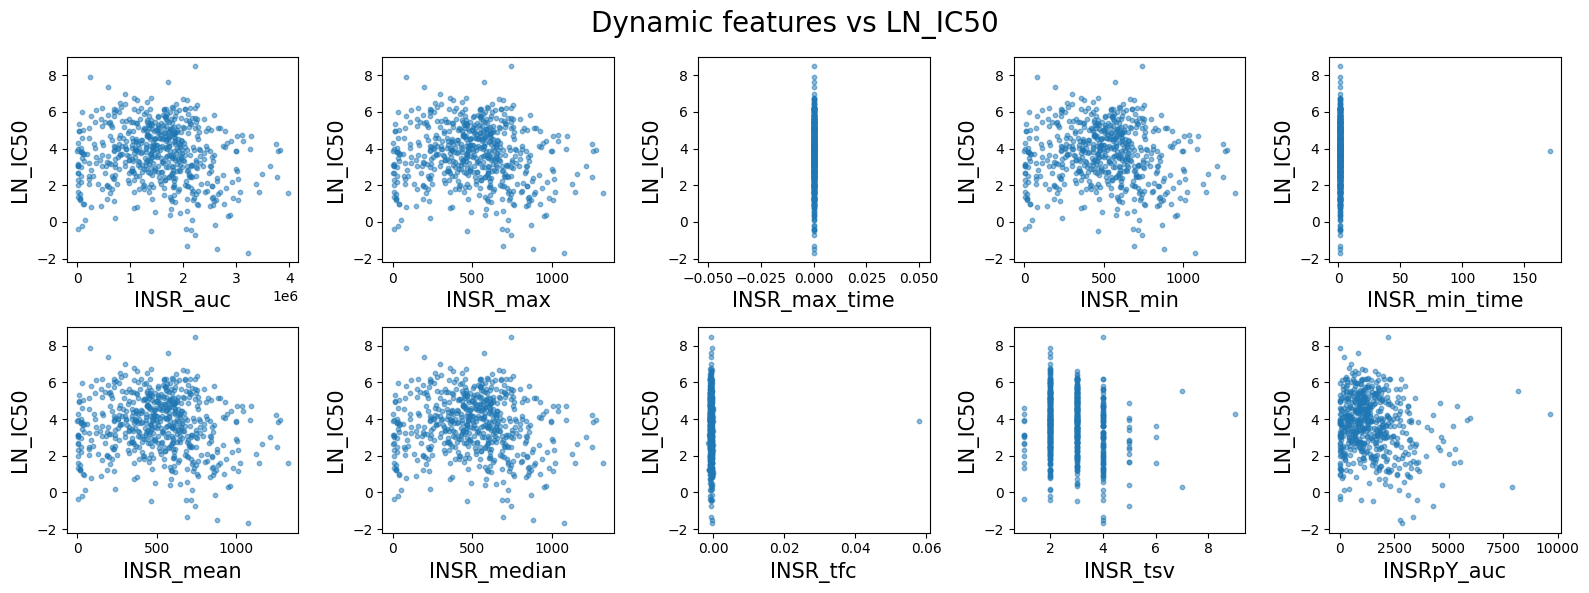

In [14]:
# plot the correlation between dynamic features, original feature and label 

# plot it as a multi-panel plot

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(16,6))

for i, dynamic_feature in enumerate(dynamic_feature_data.columns[:10]):
    ax = axes.flatten()[i]
    ax.scatter(dynamic_feature_data[dynamic_feature], dynamic_label_data, alpha=0.5, s=10)
    ax.set_xlabel(dynamic_feature, fontsize=15)
    ax.set_ylabel('LN_IC50', fontsize=15)
    
plt.suptitle(f'Dynamic features vs LN_IC50', fontsize=20)
plt.tight_layout()
plt.show()

In [33]:
from scipy.stats import pearsonr

import os

# ignore ConstantInputWarning
import warnings
from scipy.stats import ConstantInputWarning
warnings.simplefilter('ignore', ConstantInputWarning)

dynamic_feature = TheLink.get_data_from_code('dynamic_features')
ccle_data = TheLink.get_data_from_code('ccle')

match_rules_file = TheLink.get_data_from_code('integrate_ccle_anthony')
match_rules_files_dropna = match_rules_file.dropna(subset=['CCLE reference'])

dynamic_feature_label = ['auc', 'max', 'max_time',
                         'min', 'min_time', 'mean', 'median', 'tfc', 'tsv']

folder_name = 'dynamic_and_original_feature_vs_palbociclib_ic50'

if not os.path.exists(f'{path_loader.get_data_path()}data/results/{folder_name}'):
    os.makedirs(f'{path_loader.get_data_path()}data/results/{folder_name}')

file_save_path = f'{path_loader.get_data_path()}data/results/{folder_name}/'

species_ccle_matches = {}
for i in range(len(match_rules_files_dropna)):
    row = match_rules_files_dropna.iloc[i]
    specie_name = row['Protein Name']
    ccle_matches = row['CCLE reference']
    ccle_matches = ccle_matches.split(';')
    species_ccle_matches[specie_name] = ccle_matches
    
for s in species_ccle_matches:
    dynamic_specie = s 
    gene_list = species_ccle_matches[s]
    dynamic_features = dynamic_feature_data[[dynamic_specie + '_' + dynamic_feature for dynamic_feature in dynamic_feature_label]]
    
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))

    for i, dynamic_feature in enumerate(dynamic_feature_label):
        ax = axes.flatten()[i]
        label_data = dynamic_label_data
        ax.scatter(dynamic_label_data, dynamic_features[dynamic_specie + '_' + dynamic_feature], alpha=0.5, s=10, color='purple')
        
        corr, p_val = pearsonr(dynamic_label_data, dynamic_features[dynamic_specie + '_' + dynamic_feature])
        corr_str = f'{corr:.2f}' if p_val > 0.05 else f'{corr:.2f}*'
        ax.text(0.05, 0.95, f'corr: {corr_str}', transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
        # change the x and y axis labels size
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.set_xlabel('LN_IC50', fontsize=15)
        ax.set_ylabel(dynamic_specie+'_'+dynamic_feature, fontsize=15)
    
    # the final 10th plot is the label data vs original feature data
    ax = axes.flatten()[9]
    for gene in gene_list:
        gene_expression = feature_data[gene]
        ax.scatter(dynamic_label_data, gene_expression, alpha=0.5, s=10)
    
    gene_list_with_corr = []
    for gene in gene_list:
        gene_expression = feature_data[gene]
        corr, p_val = pearsonr(dynamic_label_data, gene_expression)
        corr_str = f'{corr:.2f}' if p_val > 0.05 else f'{corr:.2f}*'
        gene_corr_string = f'{gene} corr: {corr_str}'
        gene_list_with_corr.append(gene_corr_string)
        
    ax.legend(gene_list_with_corr, loc='upper left')
    ax.set_xlabel('LN_IC50', fontsize=15)
    ax.set_ylabel(dynamic_specie, fontsize=15)
    plt.suptitle(f'{dynamic_specie} dynamic/original features vs LN_IC50 of Palbociclib', fontsize=20)
    plt.tight_layout()
    
    # plt.show()
    # break

    plt.savefig(f'{file_save_path}{dynamic_specie}_dynamic_features_vs_LN_IC50.png')    
    # do not show the plot
    plt.close()
    print(f'{dynamic_specie} dynamic features vs LN_IC50 plotted')

AKT dynamic features vs LN_IC50 plotted
CYCD dynamic features vs LN_IC50 plotted
CYCE dynamic features vs LN_IC50 plotted
CDK2 dynamic features vs LN_IC50 plotted
CDK46 dynamic features vs LN_IC50 plotted
P21 dynamic features vs LN_IC50 plotted
P27 dynamic features vs LN_IC50 plotted
E2F dynamic features vs LN_IC50 plotted
GSK3B dynamic features vs LN_IC50 plotted
INSR dynamic features vs LN_IC50 plotted
IRS dynamic features vs LN_IC50 plotted
ERK dynamic features vs LN_IC50 plotted
MYC dynamic features vs LN_IC50 plotted
PI3K dynamic features vs LN_IC50 plotted
MTORC2 dynamic features vs LN_IC50 plotted
MTORC1 dynamic features vs LN_IC50 plotted
S6K dynamic features vs LN_IC50 plotted
PDK1 dynamic features vs LN_IC50 plotted
RAF dynamic features vs LN_IC50 plotted
RB dynamic features vs LN_IC50 plotted
SOS dynamic features vs LN_IC50 plotted
